In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [8]:
leis = pd.read_json('leis.json')
print(leis.info())
leis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     6033 non-null   object
 1   categoria  6033 non-null   object
 2   resumo     6033 non-null   object
 3   texto      6033 non-null   object
 4   documento  57 non-null     object
dtypes: object(5)
memory usage: 235.8+ KB
None


,titulo,categoria,resumo,texto,documento
0,"DECRETO Nº 8854, de 28 de fevereiro de 2013.",Decretos,DELEGA COMPETÊNCIA À SECRETARIA MUNICIPAL DE P...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...",None
1,"DECRETO Nº 8849, de 25 de fevereiro de 2013.",Decretos,ABRE CRÉDITO SUPLEMENTAR AO ORÇAMENTO DO MUNIC...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...",None
2,"DECRETO Nº 8853, de 27 de fevereiro de 2013.",Decretos,NOMEIA MEMBROS DO CONSELHO MUNICIPAL DE DESENV...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...",None
3,"DECRETO Nº 8967, de 17 de julho de 2013",Decretos,ALTERA O QUADRO DE DETALHAMENTO DE DESPESA DO ...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...",None
4,"DECRETO Nº 8982, de 30 de julho de 2013",Decretos,AUTORIZA O FUNCIONAMENTO DE ESTABELECIMENTOS C...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...",None


In [34]:
# Do campo texto, transforma pra minusculo e remove pontuacao
text = ' '.join(leis['texto'].tolist())
text = re.findall(r'\b[a-zÀ-ú]+\b', text.lower())

# Remove stopwords
my_stopwords = nltk.corpus.stopwords.words('portuguese')
my_words = ['feira', 'santana', 'art', 'municipal', 'lei', 'r', 
'prefeito', 'câmara', 'municipio', 'data', 'publicação', 'seguinte', 'disposições',
'estado', 'bahia', 'vigor', 'ver', 'secretário', 'ser', 'poder', 'decreto', 'projeto',
'saber', 'iii', 'i', 'ii',  'contrário', 'presidente', 'entrará', 'artigo',
'faço', 'josé', 'parágrafo', 'executivo', 'gabinete', 'único', 'sanciono', 
'desta', 'v', 'iv', 'autoria', 'através', 'silva', 'deste', 'mesa', 'chefe',
'vice', 'autor', 'edil', 'santos', 'qualquer', 'b', 'decretou', 'execução', 
'inciso', 'sobre', 'das', 'decorrentes', 'dr', 'decreta', 'resolução', 'geral',
'uso', 'ato', 'diretiva', 'costa', 'poderá', 'antonio', 'oliveira', 'exercício',
'seguintes', 'meio', 'ronaldo', 'carlos', 'm', 'c', 'correrão']
my_stopwords = my_stopwords + my_words

text = [word for word in text if word not in my_stopwords]

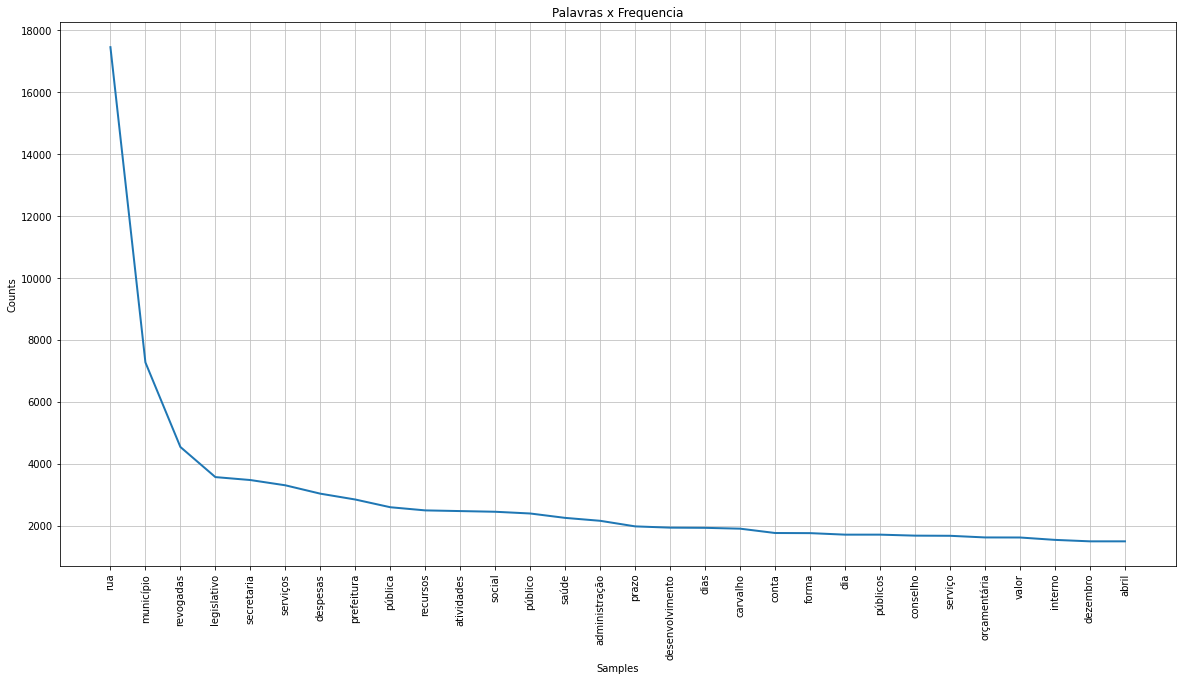

In [35]:
plt.figure(figsize=(20,10))
fd = nltk.FreqDist(text)
fd.plot(30, title='Palavras x Frequencia', cumulative=False)